# ***Por dentro do algoritmo Tesseract OCR***

Julia Carvalho de Souza Castro - 32022298


Nicole Martins dos Santos - 41990277

_________________________________________________________________________________________



## **1. um pouco de história**

O algoritmo Tesseract OCR é uma ferramenta de **reconhecimento óptico de caracteres** de código aberto, desenvolvida pela Google. Inicialmente concebido como um projeto de pesquisa de doutorado nos laboratórios da HP entre 1984 e 1994. Depois de um tempo, a ferramenta veio a público. Após anos de desenvolvimento interno, a Google liberou o Tesseract como código aberto em 2005.





________________________________________________________________________________________________

## **2. Ferramentas que utilizam muito OCR**


1. Google Drive
2. Adobe Acrobat
3. Microsoft OneNote



________________________________________________________________________________________________

## **3. Funcionamento: Detecção de Linhas e Palavras**

**3.1.  Blob Filtering**
Nesta etapa, o algoritmo de busca por linhas identifica áreas de texto em uma página, mesmo que ela esteja inclinada. Ele começa filtrando os "blobs", que são regiões conectadas de pixels na imagem que podem representar caracteres ou partes de caracteres. O filtro de altura por percentil remove caracteres grandes, como letras capitais iniciais ou caracteres que se tocam verticalmente. Em seguida, os "blobs" filtrados são organizados e processados por coordenada x, o que permite atribuí-los a linhas de texto únicas. Um ajuste de linha é aplicado usando o método de menor mediana dos quadrados para estimar as linhas de base do texto. Finalmente, os "blobs" filtrados são mesclados horizontalmente, unindo palavras com a base correta e associando partes de caracteres quebrados.



**3.2. Baseline Fitting**
Depois que as linhas de texto são encontradas, as linhas de base são ajustadas mais precisamente usando uma spline quadrática. Isso permite que o Tesseract lide com linhas de base curvas, comuns em páginas digitalizadas, sem a necessidade de retificação. Os "blobs" são agrupados com base em sua continuidade em relação à linha de base original e uma spline quadrática é ajustada ao grupo mais populoso.




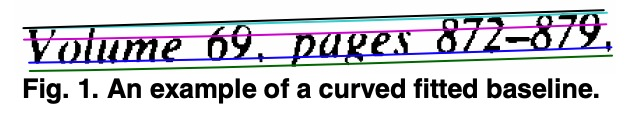

In [30]:
from IPython.display import Image
pil_img = Image(filename='1.jpeg')
display(pil_img)




**3.3. Fixed Pitch Detection and Chopping:**
O Tesseract verifica se as linhas de texto são de espaçamento fixo. Se forem, as palavras são cortadas em caracteres usando o espaçamento fixo e o "chopper" e "associator" são desativados para essas palavras.



**3.4. Proportional Word Finding:**
Para espaçamento de texto proporcional, o Tesseract mede os espaços em uma faixa vertical limitada entre a linha de base e a linha média, resolvendo problemas de espaçamento complexos. Os espaços próximos ao limite de decisão nesta etapa são tornados difusos, para que uma decisão final possa ser tomada após o reconhecimento de palavras.




**3.5. Reconhecimento de Palavras:** Após a segmentação das palavras, o Tesseract reconhece cada palavra dividida em caracteres. Ele usa um processo de classificação de dois passos para comparar características das imagens dos caracteres com protótipos conhecidos. A primeira etapa é uma pré-classificação para reduzir as opções de possíveis caracteres correspondentes, enquanto a segunda etapa compara características específicas das imagens com protótipos conhecidos para determinar a correspondência mais provável.








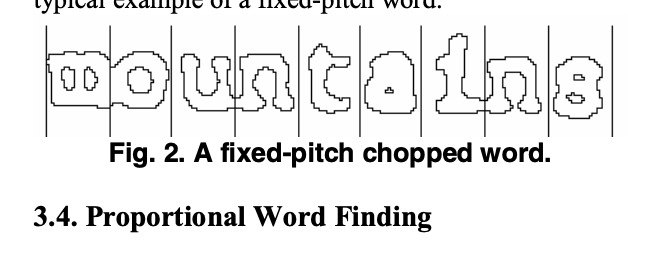

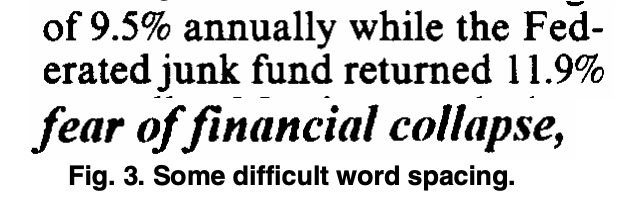

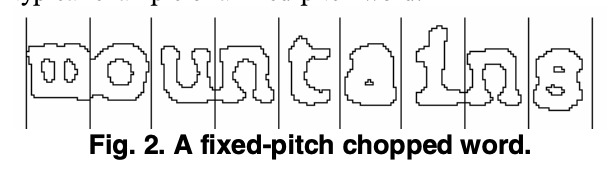

In [34]:
from IPython.display import Image
pil_img = Image(filename='2.jpeg')
display(pil_img)
pil_img = Image(filename='3.jpeg')
display(pil_img)
pil_img = Image(filename='4.jpeg')
display(pil_img)







**3.6.Análise Linguística:** Após o reconhecimento das palavras, o Tesseract realiza uma análise linguística para escolher a melhor combinação de palavras reconhecidas com base em critérios como frequência de palavras, correspondência com o dicionário e outras características linguísticas.





**3.7.Classificador Adaptativo:** O Tesseract também pode usar um classificador adaptativo para melhorar a precisão do reconhecimento de caracteres. Esse classificador é treinado com base na saída do classificador estático e é mais sensível às características de fonte específicas do documento, o que pode melhorar a discriminação entre diferentes caracteres.
**

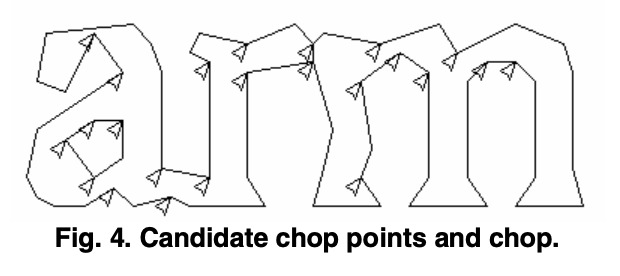

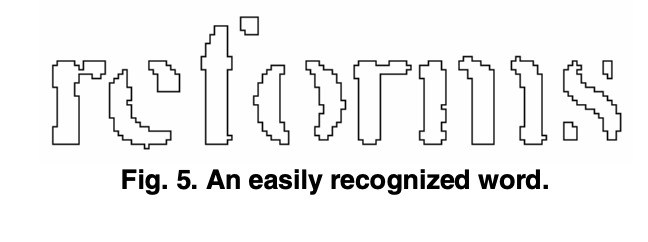

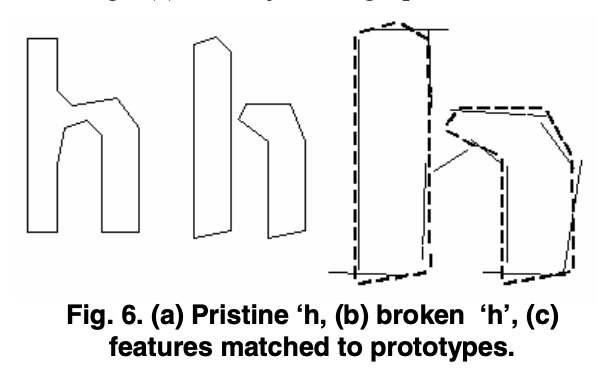

In [35]:
pil_img = Image(filename='5.jpeg')
display(pil_img)
pil_img = Image(filename='6.jpeg')
display(pil_img)
pil_img = Image(filename='7.jpeg')
display(pil_img)


_________________________________________________________________________________________



# Código exemplo

In [22]:
# Alguns códigos de instação e ambiente, caso precise

#!pip install opencv-python
#!pip install pytesseract
# !apt install tesseract-ocr
# os.environ['TESSDATA_PREFIX'] = '/usr/share/tesseract-ocr/4.00/tessdata/'
# import os
# os.environ["PATH"] += os.pathsep + "/usr/bin/tesseract"


Imagem Original:


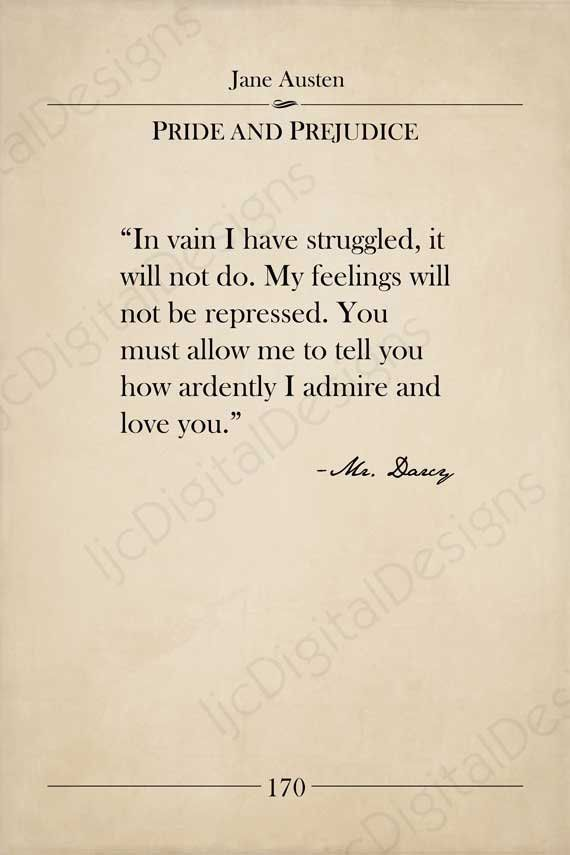

Texto extraído:
Jane Austen

Se

PRIDE AND PREJUDICE

“In vain I have struggled, it
will not do. My feelings will
not be repressed. You
must allow me to tell you
how ardently I admire and
love you.”

A, Bay

170



In [19]:
# Importando as bibliotecas necessárias
import cv2
import numpy as np
import pytesseract
from google.colab.patches import cv2_imshow
# Carregando a imagem
imagem = cv2.imread("darcy.jpg")

# Mostrando a imagem original
print("Imagem Original:")
cv2_imshow(imagem)
# Convertendo a imagem para texto usando o Tesseract OCR Engine
texto = pytesseract.image_to_string(imagem)

# Mostrando o texto extraído
print("Texto extraído:")
print(texto)

# Esperando uma tecla ser pressionada para fechar a janela
cv2.waitKey(0)
cv2.destroyAllWindows()


# Código exemplo com imagem levemente inclinado

Imagem Original:


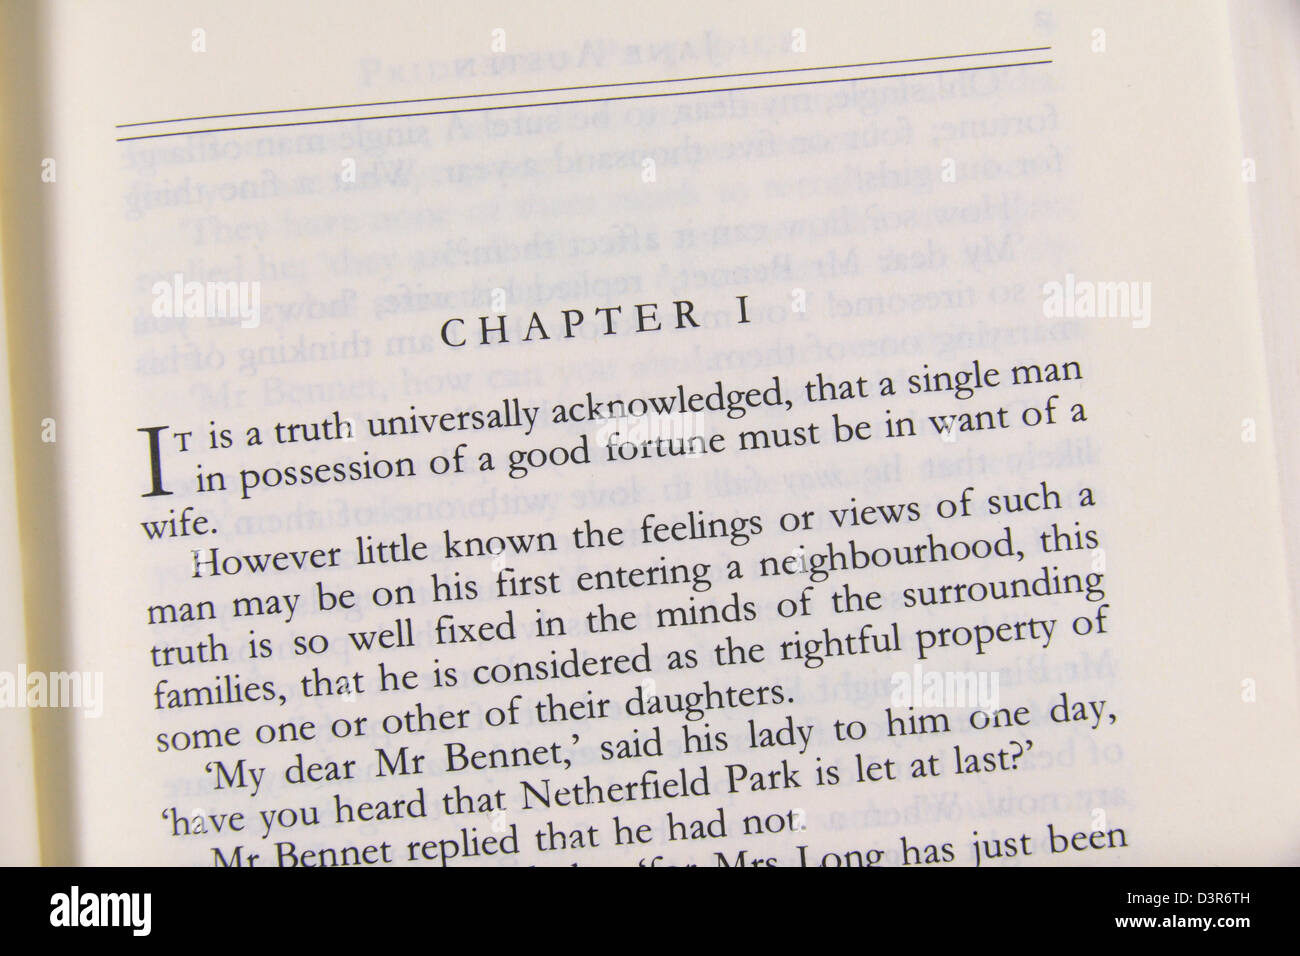

Texto extraído:
CHAPTER 1

e is a truth universally acknowledged, that a single man
in possession of a good fortune must be in want of 4
wife.
However little known the feelings Of views of such a
man may be on his first entering 4 neighbourhood, this
truth is sO well fixed in the minds of the surrounding
families, that he is considered as the rightful property ©
some one Of other of their daughters.

‘My dear Mr Bennet,’ said his lady to him one day,
‘have you heard that Netherfield Park is let at last?”

Mr Bennet replied that he had not
_ ao has just been

 
 
 
 

  



In [21]:
# Carregando a imagem
imagem = cv2.imread("orgulho_e_preconceito.jpg")

# Mostrando a imagem original
print("Imagem Original:")
cv2_imshow(imagem)

# Convertendo a imagem para texto usando o Tesseract OCR Engine
texto = pytesseract.image_to_string(imagem)

# Mostrando o texto extraído
print("Texto extraído:")
print(texto)

# Esperando uma tecla ser pressionada para fechar a janela
cv2.waitKey(0)
cv2.destroyAllWindows()


# Código exemplo com texto em português. Possui para várias outras línguas, https://tesseract-ocr.github.io/tessdoc/Data-Files-in-different-versions.html

In [25]:
!apt-get install tesseract-ocr-por

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-por
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 856 kB of archives.
After this operation, 1,998 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-por all 1:4.00~git30-7274cfa-1.1 [856 kB]
Fetched 856 kB in 1s (1,512 kB/s)
Selecting previously unselected package tesseract-ocr-por.
(Reading database ... 121965 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-por_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-por (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-por (1:4.00~git30-7274cfa-1.1) ...


Imagem Original:


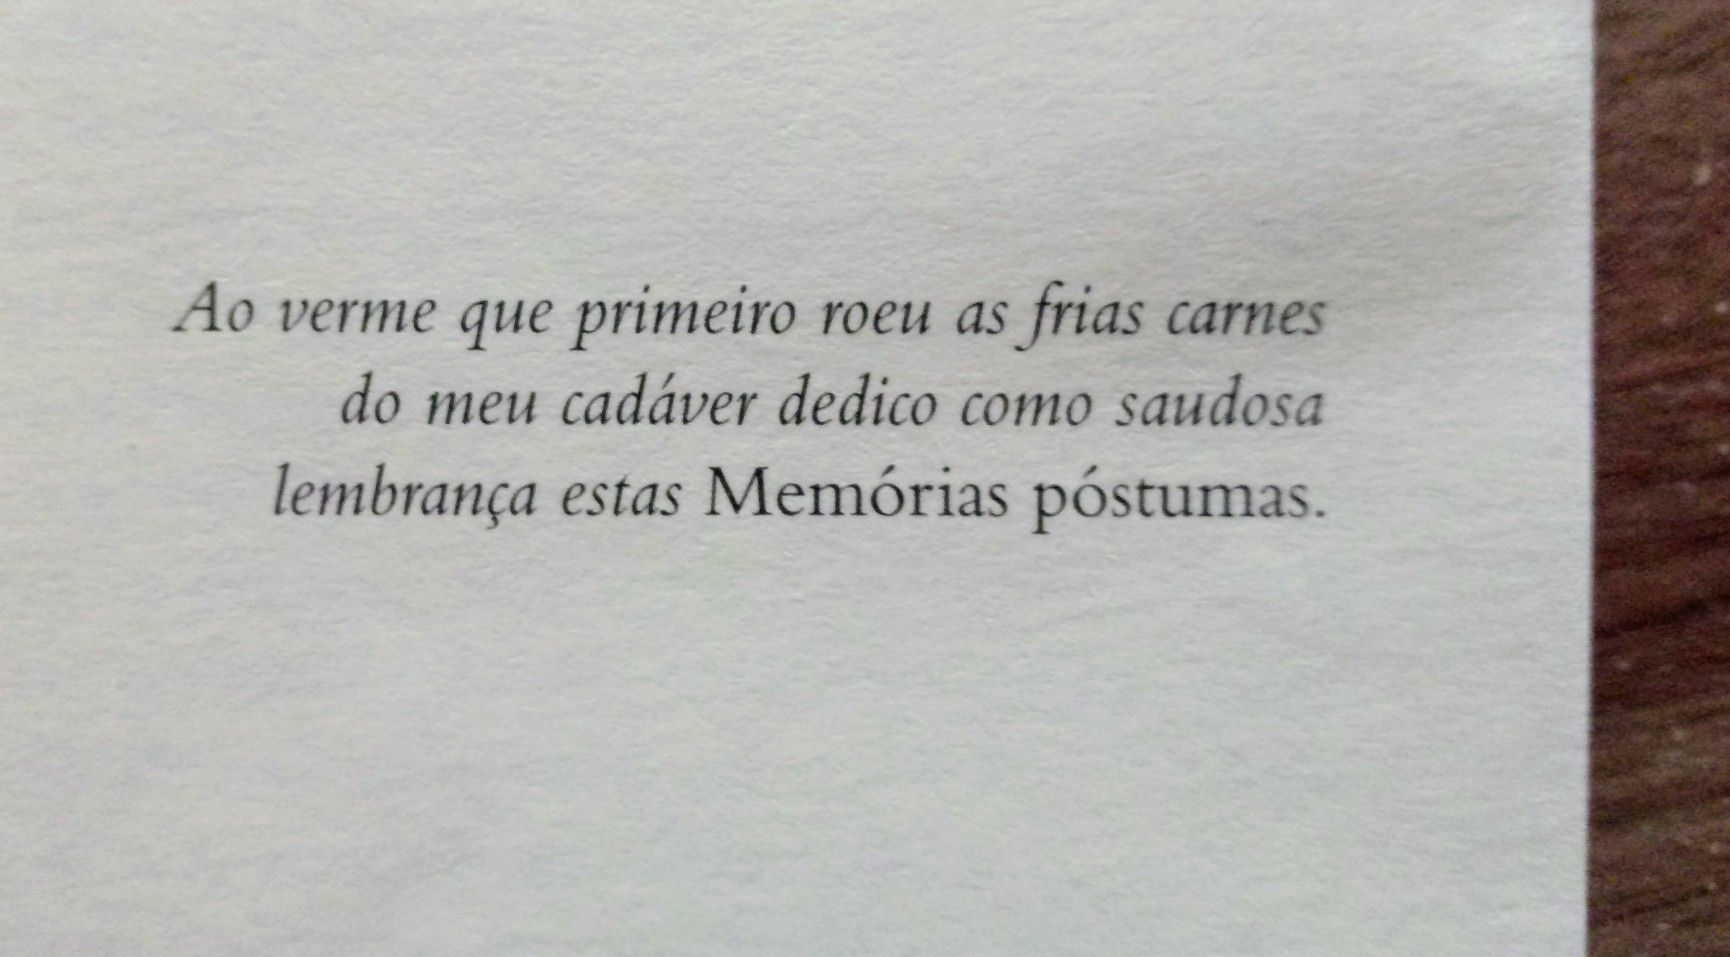

Texto extraído:
Ao verme que primeiro roeu as frias carnes
do meu cadáver dedico como saudosa
lembrança estas Memórias póstumas.

 



In [26]:
# Carregando a imagem
imagem = cv2.imread("memorias_postumas.jpg")

# Mostrando a imagem original
print("Imagem Original:")
cv2_imshow(imagem)

# Convertendo a imagem para texto usando o Tesseract OCR Engine
texto = pytesseract.image_to_string(imagem,lang='por')

# Mostrando o texto extraído
print("Texto extraído:")
print(texto)

# Esperando uma tecla ser pressionada para fechar a janela
cv2.waitKey(0)
cv2.destroyAllWindows()


# Referências

Smith, R. (n.d.). An Overview of the Tesseract OCR Engine. Google Inc. Retrieved from https://static.googleusercontent.com/media/research.google.com/pt-BR//pubs/archive/33418.pdf



Fujii, Y. (n.d.). [Invited] Optical Character Recognition. Google Research, Mountain View, CA 94043, USA. Retrieved from https://www.researchgate.net/publication/329651932



Pytesseract Documentation. (n.d.). Retrieved from https://pypi.org/project/pytesseract/







